In [21]:
# Import dependencies:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import datetime as dt

## Part I. Cryptocurrency Investment Performance Analysis

In this part, we want to analyze cryptocurrency as an investment option and we would like to answer the following question:

### Are cryptocurrencies growing in popularity in comparison to the traditional equities market?

We will use past 5-year historical market data of S&P 500 index and Gold ETF(GLD) against our cryptocurrency portfolio that consists of the top 3 digital currencies: Bitcoin(BTC), Ethereum(ETH) and Ripple(XRP). We are going to compare their Risk, Return and Trading Volume.

*Input data from Google Finance in Data directory*


In [7]:
# Determine csv path for Crypto-folio:
eth_file = Path ('Data/ETH-USD.csv')
btc_file = Path('Data/BTC-USD.csv')
xrp_file = Path('Data/XRP-USD.csv')

# Determine csv path for market indices:
sp500_file = Path('Data/S&P-500.csv')
gld_file = Path('Data/GLD_Data.csv')

# Pass the file to pandas and define the index:
eth_df = pd.read_csv(eth_file, index_col = 'Date', parse_dates=True)
btc_df = pd.read_csv(btc_file, index_col = 'Date', parse_dates=True)
xrp_df = pd.read_csv(xrp_file, index_col = 'Date', parse_dates=True)

# Pass market indices to pandas and define index:
sp500_df = pd.read_csv(sp500_file, index_col = 'Date', parse_dates=True)
gld_df = pd.read_csv(gld_file, index_col = 'Date', parse_dates=True)

In [8]:
# testing the dataframe:
xrp_df.head()
eth_df.head()
btc_df.head()
sp500_df.head()
gld_df.head()

GLD Close  GLD Volume
Date                             
2015-08-03     104.10     3528596
2015-08-04     104.31     3241016
2015-08-05     103.93     5041015
2015-08-06     104.39     3908124
2015-08-07     104.65     4400915

In [9]:
# Dropping unnecessary columns in crypto-folio:
eth_df.drop(columns=['Open', 'High', 'Low', 'Adj Close'], inplace=True)
btc_df.drop(columns=['Open', 'High', 'Low', 'Adj Close'], inplace=True)
xrp_df.drop(columns=['Open', 'High', 'Low', 'Adj Close'], inplace=True)

# Market index:
sp500_df.drop(columns=['Open', 'High', 'Low', 'Adj Close'], inplace=True)
sp500_df.head()

Close      Volume
Date                               
2015-08-03  2098.040039  3476770000
2015-08-04  2093.320068  3546710000
2015-08-05  2099.840088  3968680000
2015-08-06  2083.560059  4246570000
2015-08-07  2077.570068  3602320000

In [10]:
# Rename columns to reflect each crypto-ticker:
eth_df = eth_df.rename(columns= {'Close':'ETH Close', 'Volume':'ETH Volume'})
btc_df = btc_df.rename(columns= {'Close':'BTC Close', 'Volume':'BTC Volume'})
xrp_df = xrp_df.rename(columns= {'Close':'XRP Close', 'Volume':'XRP Volume'})
sp500_df = sp500_df.rename(columns= {'Close':'S&P500 Close', 'Volume':'S&P500 Volume'})
sp500_df.head()

S&P500 Close  S&P500 Volume
Date                                   
2015-08-03   2098.040039     3476770000
2015-08-04   2093.320068     3546710000
2015-08-05   2099.840088     3968680000
2015-08-06   2083.560059     4246570000
2015-08-07   2077.570068     3602320000

---

In [11]:
# Calculate Daily returns for each ticker:

# ETH RETURNS:
eth_returns=eth_df['ETH Close'].pct_change()
eth_returns.head() # notice name is ETH Close still, need to change but it's a series!

# convert series to dataframe:
eth_returns = eth_returns.to_frame()

# reanme colum & drop null:
eth_returns = eth_returns.rename(columns={'ETH Close':'ETH'})
eth_returns.dropna(inplace=True)
eth_returns.head()

ETH
Date                
2015-08-08 -0.728249
2015-08-09 -0.068268
2015-08-10  0.009333
2015-08-11  0.507323
2015-08-12  0.140075

In [12]:
# BTC RETURNS:
btc_returns=btc_df['BTC Close'].pct_change()
btc_returns = btc_returns.to_frame()
btc_returns = btc_returns.rename(columns={'BTC Close':'BTC'})
btc_returns.dropna(inplace=True)
btc_returns.head()

BTC
Date                
2015-08-02  0.003597
2015-08-03 -0.004908
2015-08-04  0.014191
2015-08-05 -0.011696
2015-08-06 -0.011725

In [13]:
# XRP RETURNS:
xrp_returns=xrp_df['XRP Close'].pct_change()
xrp_returns = xrp_returns.to_frame()
xrp_returns = xrp_returns.rename(columns={'XRP Close':'XRP'})
xrp_returns.dropna(inplace=True)
xrp_returns.head()

XRP
Date                
2015-08-02  0.000973
2015-08-03  0.006197
2015-08-04 -0.001208
2015-08-05 -0.005683
2015-08-06 -0.024319

In [14]:
# SP500 RETURNS:
sp500_returns = sp500_df['S&P500 Close'].pct_change()
sp500_returns = sp500_returns.to_frame()
sp500_returns = sp500_returns.rename(columns={'S&P500 Close':'S&P500'})
sp500_returns.dropna(inplace=True)
sp500_returns.head()

S&P500
Date                
2015-08-04 -0.002250
2015-08-05  0.003115
2015-08-06 -0.007753
2015-08-07 -0.002875
2015-08-10  0.012808

In [15]:
# GLD RETURNS:
gld_returns = gld_df['GLD Close'].pct_change()
gld_returns = gld_returns.to_frame()
gld_returns = gld_returns.rename(columns={'GLD Close':'GLD'})
gld_returns.dropna(inplace=True)
gld_returns.head()

GLD
Date                
2015-08-04  0.002017
2015-08-05 -0.003643
2015-08-06  0.004426
2015-08-07  0.002491
2015-08-10  0.010225

In [16]:
# Concat all dataframes to extract volume data only:
crypto= pd.concat([btc_df, eth_df, xrp_df, sp500_df, gld_df], axis='columns', join='inner')
crypto.head()

BTC Close  BTC Volume  ETH Close  ETH Volume  XRP Close  \
Date                                                                   
2015-08-07  279.584991    42484800   2.772120      164329   0.008152   
2015-08-10  264.470001    20979400   0.708448      405283   0.008750   
2015-08-11  270.385986    25433900   1.067860     1463100   0.008591   
2015-08-12  266.376007    26815400   1.217440     2150620   0.008271   
2015-08-13  264.079987    27685500   1.827670     4068680   0.008147   

            XRP Volume  S&P500 Close  S&P500 Volume  GLD Close  GLD Volume  
Date                                                                        
2015-08-07      363643   2077.570068     3602320000     104.65     4400915  
2015-08-10      472973   2104.179932     3514460000     105.72     5892602  
2015-08-11      282461   2084.070068     3708880000     106.26     4060892  
2015-08-12      287463   2086.050049     4269130000     107.75    10022547  
2015-08-13      202934   2083.389893     3221300000     106.86     4761682

In [110]:
# dataframe that has only volume for each ticker:
crypto_vol = crypto.drop(columns=['BTC Close', 'ETH Close', 'XRP Close', 'S&P500 Close', 'GLD Close'])
crypto_vol.head()

BTC Volume  ETH Volume  XRP Volume  S&P500 Volume  GLD Volume
Date                                                                     
2015-08-07    42484800      164329      363643     3602320000     4400915
2015-08-10    20979400      405283      472973     3514460000     5892602
2015-08-11    25433900     1463100      282461     3708880000     4060892
2015-08-12    26815400     2150620      287463     4269130000    10022547
2015-08-13    27685500     4068680      202934     3221300000     4761682

In [111]:
# Monte Carlo Simulation 

crypto_close = crypto.drop(columns=['BTC Volume', 'ETH Volume', 'XRP Volume', 'S&P500 Volume','GLD Volume'])
crypto_return = crypto_close.pct_change()
crypto_return.dropna(inplace=True)
crypto_return.head()
crypto_close.tail()

BTC Close   ETH Close  XRP Close  S&P500 Close  GLD Close
Date                                                                   
2020-07-27  10990.87305  321.514099   0.223672   3239.409912     182.23
2020-07-28  10912.82324  316.657257   0.230277   3218.439941     183.75
2020-07-29  11100.46777  318.190887   0.243099   3258.439941     185.13
2020-07-30  11111.21387  334.586639   0.244522   3246.219971     183.76
2020-07-31  11323.46680  345.554657   0.258904   3271.120117     185.43

In [80]:
avg_btc, vol_btc = crypto_return.mean()['BTC Close'], crypto_return.std()['BTC Close']
avg_eth, vol_eth = crypto_return.mean()['ETH Close'], crypto_return.std()['ETH Close']
avg_xrp, vol_xrp = crypto_return.mean()['XRP Close'], crypto_return.std()['XRP Close']
avg_sp, vol_sp = crypto_return.mean()['S&P500 Close'], crypto_return.std()['S&P500 Close']
avg_gld, vol_gld = crypto_return.mean()['GLD Close'], crypto_return.std()['GLD Close']

In [81]:
last_px = crypto_close.iloc[-1]
last_px

BTC Close       11323.466800
ETH Close         345.554657
XRP Close           0.258904
S&P500 Close     3271.120117
GLD Close         185.430000
Name: 2020-07-31 00:00:00, dtype: float64

---

In [82]:
number_simulations = 100
number_records = 252 * 5
monte_carlo = pd.DataFrame()

crypto_sim_price_df = pd.DataFrame()
crypto_port_cum_returns = pd.DataFrame()

sg_sim_price_df = pd.DataFrame()
sg_port_cum_returns = pd.DataFrame()

for n in range(number_simulations):
    
    sim_btc_pxs = [last_px['BTC Close']]
    sim_eth_pxs = [last_px['ETH Close']]
    sim_xrp_pxs = [last_px['XRP Close']]
    sim_sp500_pxs = [last_px['S&P500 Close']]
    sim_gld_pxs = [last_px['GLD Close']]
    
    for i in range(number_records):
        
        # sim each price
        sim_btc = sim_btc_pxs[-1] * (1 + np.random.normal(avg_btc, vol_btc))
        sim_eth = sim_eth_pxs[-1] * (1 + np.random.normal(avg_eth, vol_eth))
        sim_xrp = sim_xrp_pxs[-1] * (1 + np.random.normal(avg_xrp, vol_xrp))
        sim_sp500 = sim_sp500_pxs[-1] * (1 + np.random.normal(avg_sp, vol_sp))
        sim_gld = sim_gld_pxs[-1] * (1 + np.random.normal(avg_gld, vol_gld))
        
        
        # Append the simulated price to the list
        sim_btc_pxs.append(sim_btc)
        sim_eth_pxs.append(sim_eth)
        sim_xrp_pxs.append(sim_xrp)
        sim_sp500_pxs.append(sim_sp500)
        sim_gld_pxs.append(sim_gld)
        
    crypto_sim_price_df["BTC"] = pd.Series(sim_btc_pxs)
    crypto_sim_price_df["ETH"] = pd.Series(sim_eth_pxs)
    crypto_sim_price_df["XRP"] = pd.Series(sim_xrp_pxs)
    
    sg_sim_price_df["SPX"] = pd.Series(sim_sp500_pxs)
    sg_sim_price_df["GLD"] = pd.Series(sim_gld_pxs)
    
    # Calculate the daily returns of simulated prices
    crypto_sim_daily_returns = crypto_sim_price_df.pct_change()
    crypto_weights = [0.33, 0.33, 0.34]
    
    sg_sim_daily_returns = sg_sim_price_df.pct_change()
    sg_weights = [0.8, 0.2]
    
    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    crypto_port_daily_returns = crypto_sim_daily_returns.dot(crypto_weights)
    sg_port_daily_returns = sg_sim_daily_returns.dot(sg_weights)
    
    # Calculate the normalized, cumulative return series
    crypto_port_cum_returns[n] = (1 + crypto_port_daily_returns.fillna(0)).cumprod()
    sg_port_cum_returns[n] = (1 + sg_port_daily_returns.fillna(0)).cumprod()
    
crypto_port_cum_returns.tail()    
sg_port_cum_returns.tail()

0         1         2         3         4         5         6   \
1256  2.257673  1.889057  2.491730  3.032264  1.382823  1.813837  0.790227   
1257  2.283937  1.898431  2.515216  3.020748  1.369375  1.807260  0.794127   
1258  2.239557  1.872464  2.537076  2.983581  1.367390  1.807431  0.790374   
1259  2.270943  1.867306  2.492702  3.001205  1.388264  1.850234  0.794565   
1260  2.275091  1.892146  2.497377  2.925664  1.374818  1.856232  0.788178   

            7         8         9   ...        90        91        92  \
1256  1.489631  2.118597  1.004984  ...  2.743119  0.772139  3.094730   
1257  1.483155  2.154407  1.008673  ...  2.717608  0.775066  3.043548   
1258  1.492089  2.146208  1.025884  ...  2.738511  0.768414  3.070080   
1259  1.519728  2.147527  1.022115  ...  2.765873  0.777307  3.045916   
1260  1.524051  2.116245  1.017041  ...  2.813369  0.772246  3.063235   

            93        94        95        96        97        98        99  
1256  2.030256  1.095169  1.876480  1.414068  3.285342  1.669162  1.755641  
1257  2.010940  1.104118  1.885429  1.411486  3.290106  1.668229  1.748897  
1258  1.997519  1.124453  1.861776  1.418989  3.277593  1.685522  1.762194  
1259  2.003397  1.114530  1.853647  1.422926  3.238961  1.705680  1.728205  
1260  2.010121  1.123951  1.824951  1.425617  3.229329  1.710159  1.716737  

[5 rows x 100 columns]

In [112]:
crypto_vol.head()

BTC Volume  ETH Volume  XRP Volume  S&P500 Volume  GLD Volume
Date                                                                     
2015-08-07    42484800      164329      363643     3602320000     4400915
2015-08-10    20979400      405283      472973     3514460000     5892602
2015-08-11    25433900     1463100      282461     3708880000     4060892
2015-08-12    26815400     2150620      287463     4269130000    10022547
2015-08-13    27685500     4068680      202934     3221300000     4761682

# OUTPUTS

## Daily returns for Market Index & Crypto-folio

In [19]:
crypto_folio= pd.concat([btc_returns, eth_returns, xrp_returns, sp500_returns, gld_returns], axis='columns', join='inner')
crypto_folio.head()

BTC       ETH       XRP    S&P500       GLD
Date                                                        
2015-08-10 -0.002313  0.009333 -0.006585  0.012808  0.010225
2015-08-11  0.022369  0.507323 -0.018171 -0.009557  0.005108
2015-08-12 -0.014831  0.140075 -0.037248  0.000950  0.014022
2015-08-13 -0.008619  0.501240 -0.014992 -0.001275 -0.008260
2015-08-14  0.006059  0.000109  0.023321  0.003912 -0.000094

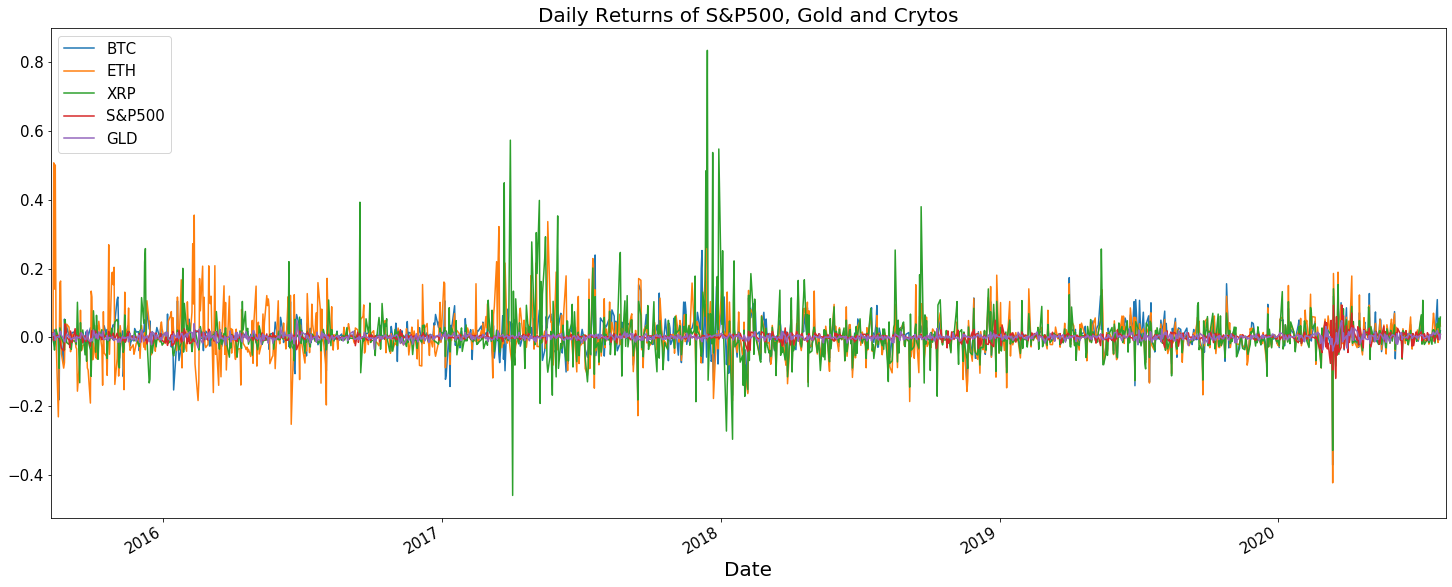

In [23]:
# Visualizing Daily returns for each:

%matplotlib inline
crypto_folio_plot = crypto_folio.plot(title="Daily Returns of S&P500, Gold and Crytos", figsize=(25,10),
                                     fontsize=15, xlim=(dt.date(2015,8,7),dt.date(2020,8,7)))
crypto_folio_plot.xaxis.label.set_size(20);
crypto_folio_plot.title.set_size(20);
crypto_folio_plot.legend(loc=2, fontsize=15);
plt.savefig('p1_crypto_folio_plot.png')

As we can see, daily returns of Ripple and Ethereum are more extreme compared to others. For example in 2018, Ripple went up by more than 80% daily while S&P500 and Gold are well capped by 20% for the past 5 years. 

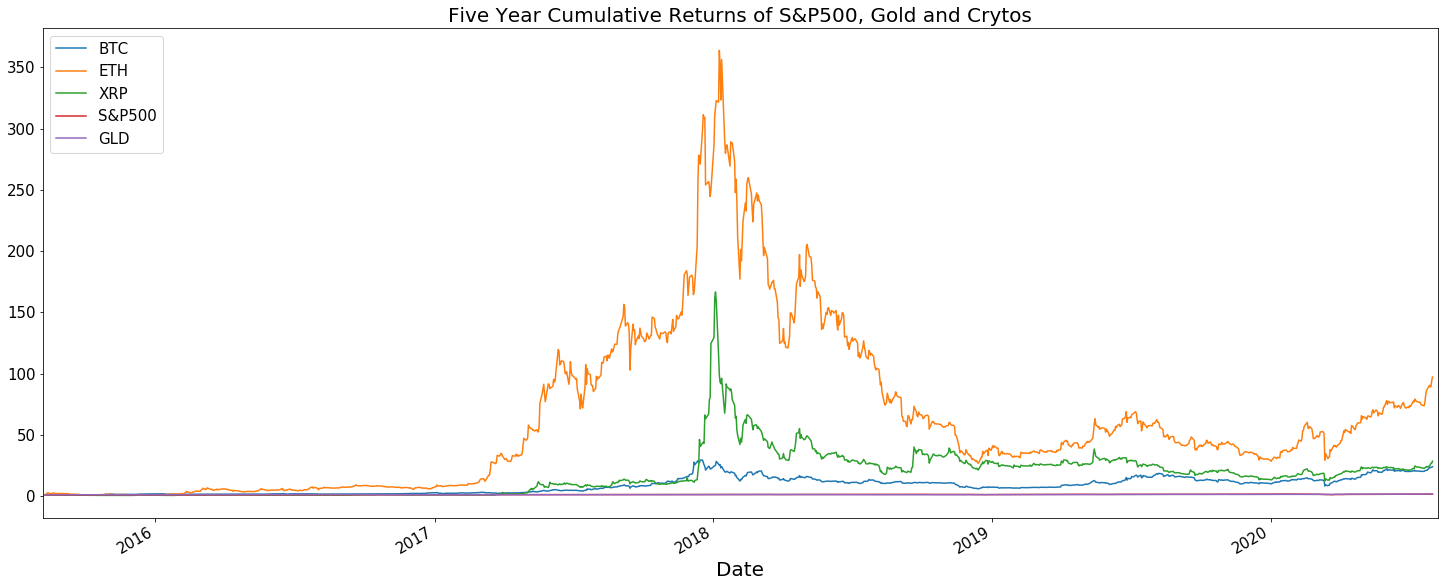

In [26]:
cum_returns = (1 + crypto_folio).cumprod()
cum_crypto_return_plot = cum_returns.plot(title="Five Year Cumulative Returns of S&P500, Gold and Crytos", figsize=(25,10),
                                     fontsize=15, xlim=(dt.date(2015,8,7),dt.date(2020,8,7)))

cum_crypto_return_plot.xaxis.label.set_size(20);
cum_crypto_return_plot.title.set_size(20);
cum_crypto_return_plot.legend(loc=2, fontsize=15);
plt.savefig('p1_cum_crypto_plot.png')                     

Based on the extreme volatility shown in the previous daily return graph, it is expected that the cumulative returns of crytos would not be a steadily upward line, but we can tell they still well outshined the performance of S&P 500 and Gold. The peak at almost 35000% cumulative return of Ethereum from 2015 to 2018 shows the bubble when Crytocurrency became an insane fever internationally and then rapidly plunged due to people's fear and doubt in its real intrinsic value. By contrast, market and gold returns seem almost flat because of the massive scale from Cryptos, so it will be helpful to see how much returns that actually has been generated from August 2015 to August 2020 compared to Ethereum: 

In [50]:
cum_returns.tail()

BTC        ETH        XRP    S&P500       GLD
Date                                                           
2020-07-27  23.240734  90.399699  24.572662  1.559230  1.741328
2020-07-28  23.075694  89.034107  25.298289  1.549137  1.755853
2020-07-29  23.472477  89.465316  26.706917  1.568390  1.769040
2020-07-30  23.495200  94.075288  26.863248  1.562508  1.755948
2020-07-31  23.944019  97.159152  28.443258  1.574493  1.771906

In [51]:
# cum_returns['BTC'].plot(figsize=(10,5), title='Bitcoin Cumulative returns from 08/01/2015-08/01/2020')
tickers = ['S&P500', 'GLD', 'ETH']
tickers

['S&P500', 'GLD', 'ETH']

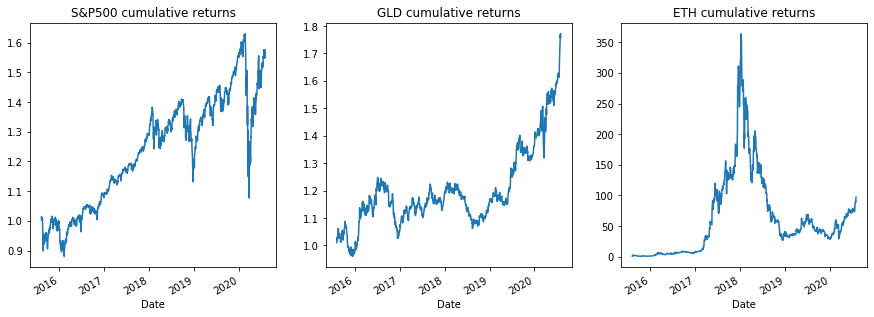

In [53]:
for i in range(1,4):
    plt.subplot(1, 3, i)
    cum_returns[tickers[i-1]].plot(figsize=(15,5), title= tickers[i-1] + ' cumulative returns')
plt.savefig('p1_cum_single_plot.png')  

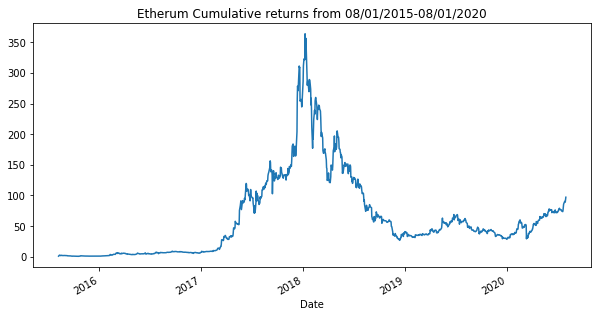

In [54]:
cum_returns['ETH'].plot(figsize=(10,5), title='Etherum Cumulative returns from 08/01/2015-08/01/2020')

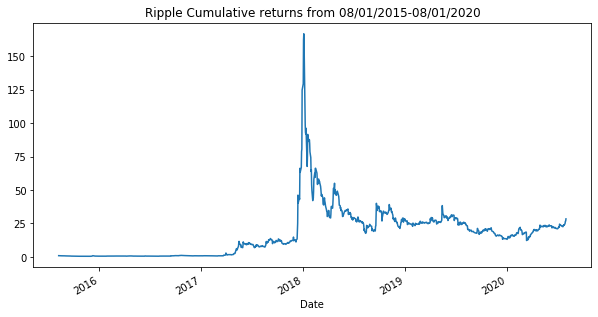

In [55]:
cum_returns['XRP'].plot(figsize=(10,5), title='Ripple Cumulative returns from 08/01/2015-08/01/2020')

In [63]:
# let's look at the numbers & see my investment returns if we started with $ 5000 in each:
btc = cum_returns['BTC'].iloc[-1] *5000
eth = cum_returns['ETH'].iloc[-1] *5000
xrp = cum_returns['XRP'].iloc[-1] *5000
sp_500 = cum_returns['S&P500'].iloc[-1] *5000
gld = cum_returns['GLD'].iloc[-1] *5000

print(f'If $ 5000 was invested in Bitcoin, I would end up after 5 years with'  f' $ {round(btc)}')
print(f'If $ 5000 was invested in Etherum, I would end up after 5 years with' f' $ {round(eth)}')
print(f'If $ 5000 was invested in Ripple, I would end up after 5 years with' f'  $ {round(xrp)}')
print(f'If $ 5000 was invested in Gold, I would end up after 5 years with' f'  $ {round(gld)}')
print(f'If $ 5000 was invested in S&P 500, I would end up after 5 years with' f'  $ {round(sp_500)}')

If $ 5000 was invested in Bitcoin, I would end up after 5 years with $ 119720.0
If $ 5000 was invested in Etherum, I would end up after 5 years with $ 485796.0
If $ 5000 was invested in Ripple, I would end up after 5 years with  $ 142216.0
If $ 5000 was invested in Gold, I would end up after 5 years with  $ 8860.0
If $ 5000 was invested in S&P 500, I would end up after 5 years with  $ 7872.0


See the numbers in dollar terms and the investment returns if we start with $5000 for each asset: 

If $ 5000 was invested in Bitcoin, I would end up after 5 years with $ 119720.0 <br />
If $ 5000 was invested in Etherum, I would end up after 5 years with $ 485796.0 <br />
If $ 5000 was invested in Ripple, I would end up after 5 years with  $ 142216.0 <br />
If $ 5000 was invested in Gold, I would end up after 5 years with  $ 8860.0 <br />
If $ 5000 was invested in S&P 500, I would end up after 5 years with  $ 7872.0 <br />

In [67]:
# daily_std = crypto_folio.std().sort_values(ascending=True)
sorted_ind = crypto_folio.std().sort_values(ascending=False).index
daily_std = crypto_folio.std()[sorted_ind]
daily_std

XRP       0.074356
ETH       0.068130
BTC       0.042398
S&P500    0.012239
GLD       0.008474
dtype: float64

In [68]:
import numpy as np
Annualized_std = daily_std * np.sqrt(252)
Annualized_std

XRP       1.180363
ETH       1.081535
BTC       0.673042
S&P500    0.194288
GLD       0.134523
dtype: float64

In [61]:
# show the relationship accross the chosen platform:
correlation = crypto_folio.corr()
correlation

BTC       ETH       XRP    S&P500       GLD
BTC     1.000000  0.473789  0.355066  0.147120  0.105666
ETH     0.473789  1.000000  0.332140  0.138930  0.083419
XRP     0.355066  0.332140  1.000000  0.111459  0.045788
S&P500  0.147120  0.138930  0.111459  1.000000 -0.046246
GLD     0.105666  0.083419  0.045788 -0.046246  1.000000

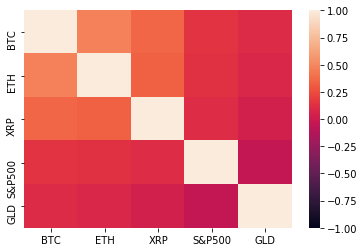

In [70]:
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)
plt.savefig('corr.png')  

### S&P 500 & gold has a negative correlation, when one increases the other decreases
### Cryptocurrencies are all related and moves together almost by 50%, while on the other hand S&P 500 & Gold have a positive correlation with crypto around 10%

In [71]:
sharpe_ratio = (crypto_folio.mean() * 252) / (crypto_folio.std() * np.sqrt(252))
sharpe_ratio

BTC       1.290668
ETH       1.375713
XRP       1.104044
S&P500    0.567319
GLD       0.921855
dtype: float64

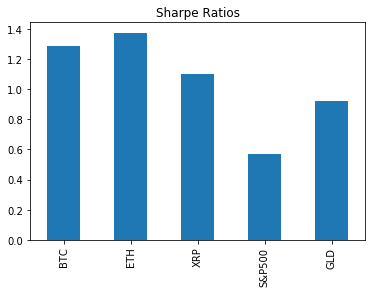

In [73]:
sharpe_ratio.plot(kind="bar", title="Sharpe Ratios")
plt.savefig('p1_sharpe_ratios.png')  

Etherum offers the best Risk-adjusted returns among all treadable stocks followed by bitcoin, Ripple, Gold and S&P 500.

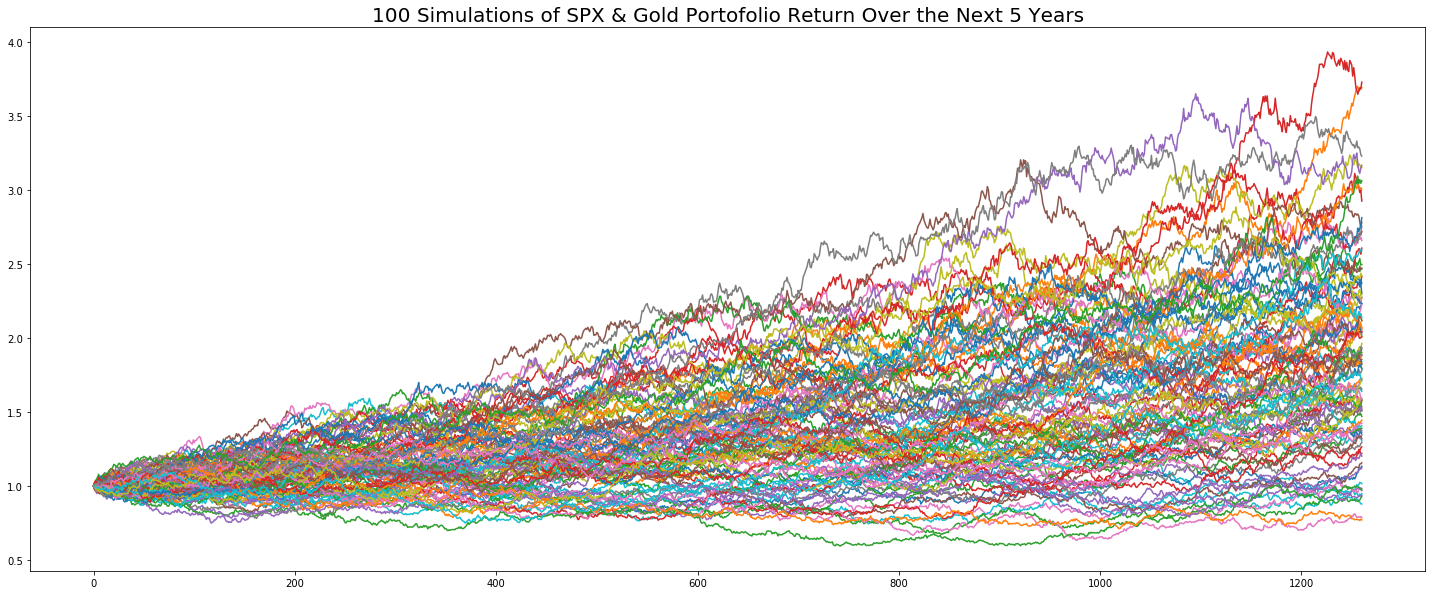

In [83]:
# MONTE CARLO SIMULATION 

sg_port_plot_title = f"{n+1} Simulations of SPX & Gold Portofolio Return Over the Next 5 Years"
sg_port_plot = sg_port_cum_returns.plot(legend=None, title=sg_port_plot_title, figsize=(25,10))
sg_port_plot.title.set_size(20);

plt.savefig('p1_sg_port_plot.png')

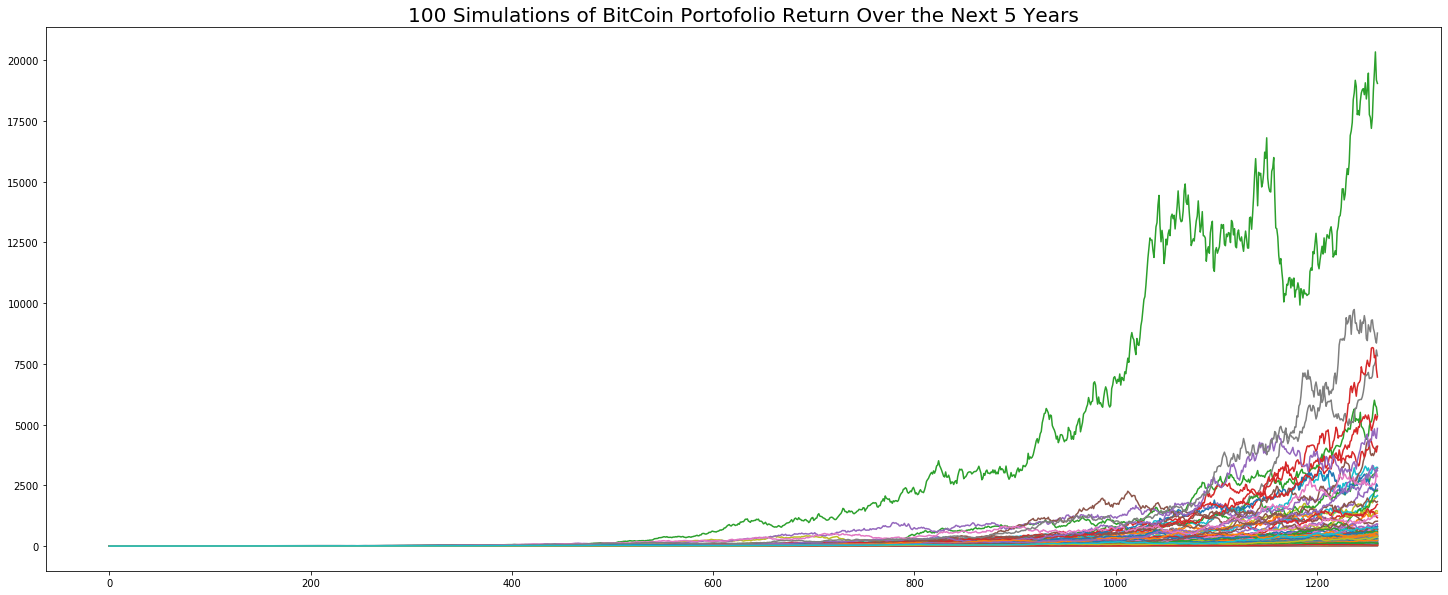

In [84]:
crypto_port_plot_title = f"{n+1} Simulations of BitCoin Portofolio Return Over the Next 5 Years"
crypto_port_plot = crypto_port_cum_returns.plot(legend=None, title=crypto_port_plot_title, figsize=(25,10))
crypto_port_plot.title.set_size(20);

plt.savefig('p1_crypto_port_plot.png')

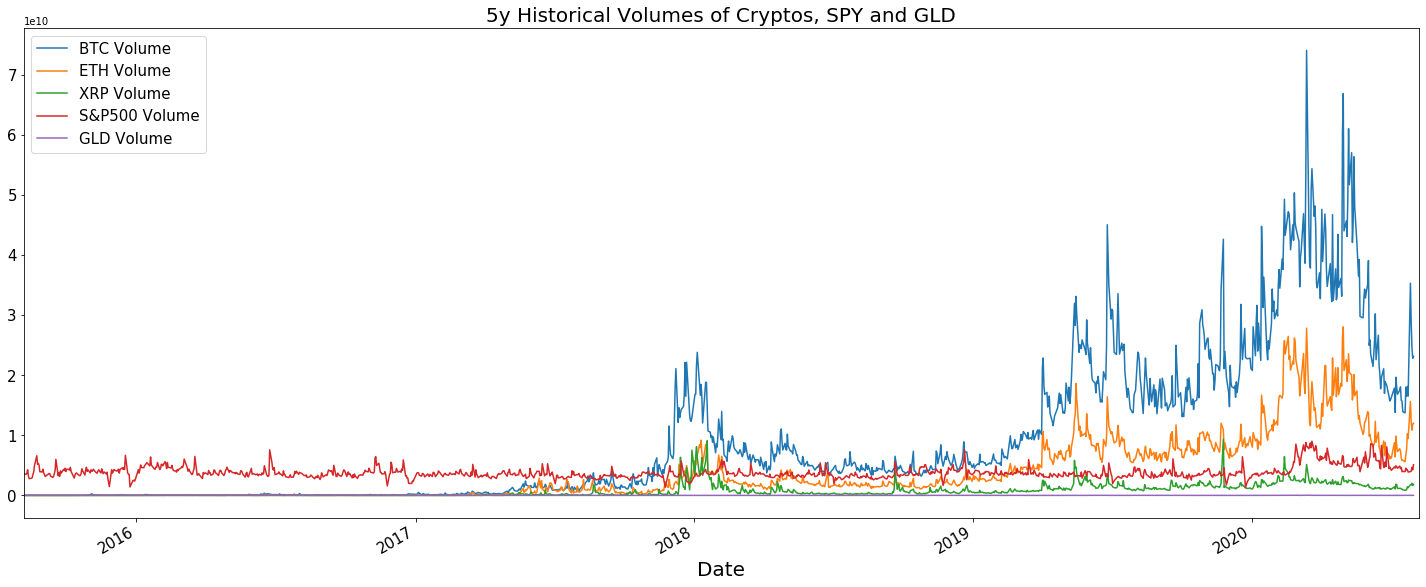

In [113]:
hist_volume_plot = crypto_vol.plot(figsize=(25,10), title="5y Historical Volumes of Cryptos, SPY and GLD", 
                                        fontsize=15, xlim=(dt.date(2015,8,7),dt.date(2020,8,7)))
hist_volume_plot.xaxis.label.set_size(20);
hist_volume_plot.title.set_size(20);
hist_volume_plot.legend(loc=2, fontsize=15);
plt.savefig('p1_volume_plot.png')

Trading volume of BTC is about 6 times higher than SPY during peak period which is about 70 billion and dwarf SPY and GLD. However, it is worth noticing that trading volume of Cryptos were very low before mid 2017 and then surpassed the other traditional assets in a fast speed. Let's take a closer look at trading volumes 5 years ago and after. 

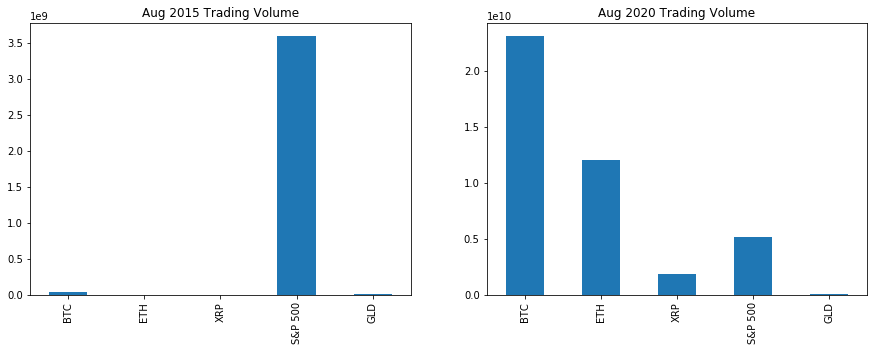

In [114]:
crypto_vol.columns = ['BTC', 'ETH', 'XRP', 'S&P 500', 'GLD']
volume_first_row = crypto_vol.iloc[0]
volume_last_row = crypto_vol.iloc[-1]
volume_first_row.plot(kind='bar', title='Aug 7 2015 Trading Volume')
volume_last_row.plot(kind='bar', title='Jul 31 2020 Trading Volume')

title_years = ['Aug 2015 Trading Volume', 'Aug 2020 Trading Volume']
for j in range(1,3):
    plt.subplot(1, 2, j)
    crypto_vol.iloc[1-j].plot(kind='bar', title= title_years[j-1], figsize=(15,5))
plt.savefig('p1_comp_vol.png', pad_inches=0.5)  